In [1]:
#Importing main module
from cosmicfishpie.fishermatrix.cosmicfish import FisherMatrix
import numpy as np

# Choose input parameters

In [2]:
#Define the observables you are interested in
observables = [['GCph','WL']]

runRootName = "LCDM_5p_symb"
#Input options for CosmicFish (global options)
options = {'accuracy': 1,
           #'outroot': 'LCDM_camb_int-full-HMc2020',
           'results_dir': 'results/',
           'derivatives': '3PT',
           'nonlinear': True,
           'feedback': 1,
           'survey_name': 'Euclid',
           'specs_dir' : '../cosmicfishpie/configs/default_survey_specifications/',
           #'survey_name_photo': 'Euclid-Photometric-ISTF-Pessimistic',
           #'survey_name_spectro': 'Euclid-Spectroscopic-'+'ISTF-Pessimistic',
           'cosmo_model' : 'LCDM',
           'code': 'symbolic',
           #'camb_config_yaml':'../boltzmann_yaml_files/camb/default.yaml'
           }

specas = {
    'ISTF-Pessimistic': {'specs_dir': '../cosmicfishpie/configs/default_survey_specifications/'},
    'DeboleR1': {'specs_dir': '../cosmicfishpie/configs/other_survey_specifications/'}
}

#Internally Cosmicfish converts these Parameters to the coresponding parameters in CAMB or CLASS 
fiducial = {
            "Omegam":0.3186,
            #'omch2':0.121259,
            #"ombh2":0.0227,
            "Omegab": 0.0491989,
            #"w0":-1.0,
            #"wa":0.,
            "h":0.6737,
            "ns":0.966,
            #"logAs":3.04,
            "sigma8" : 0.81,
            #"mnu":0.06,
            #"Neff":3.043
            }

#Parameters to be varied and analyzed and their percentage variation for numerical derivatives
# IA params and photometric galaxy bias are added automatically to these parameters
freepars = {
            #'omch2': 0.01,
            #'ombh2': 0.01,
            #'logAs' : 0.01,
            #'w0': 0.01,
            #'wa': 0.01,
            'Omegab':0.01,
            'h': 0.01,
            'ns': 0.01,
            'sigma8': 0.01,
            'Omegam':0.01,
            }

In [3]:
runFishers = True
runCosmo = True

In [4]:
FishersList = []
cosmoFM = dict()
for obse in observables:
    for speci in specas.keys():
        options['specs_dir'] = specas[speci]['specs_dir']
        options['outroot'] = runRootName + '_' + speci
        options['survey_name_photo'] = 'Euclid-Photometric-' + speci
        if runCosmo:
            cosmoFM[options['outroot']] = FisherMatrix(fiducialpars=fiducial, 
                            freepars=freepars, 
                            options=options,
                            observables=obse,
                            cosmoModel=options['cosmo_model'],
                            surveyName=options['survey_name'],
                            )
            print("-->running: ", options['outroot'])
            if runFishers:
                FishersList.append(cosmoFM[options['outroot']].compute())

****************************************************************
   _____               _     _____     __  
  / ___/__  ___ __ _  (_)___/ __(_)__ / /  
 / /__/ _ \(_-</  ' \/ / __/ _// (_-</ _ \ 
 \___/\___/___/_/_/_/_/\__/_/ /_/___/_//_/ 

****************************************************************
 This is the new Python version of the CosmicFish code.
****************************************************************

  -> Survey loaded:  Euclid-Spectroscopic-ISTF-Pessimistic

  -> Survey loaded:  Euclid-Photometric-ISTF-Pessimistic

  -> Computing cosmology at the fiducial point

  ---> Cosmological functions obtained in:   0.16 s
-->running:  LCDM_5p_symb_ISTF-Pessimistic

In class: FisherMatrix  ----> Computing photo Fisher matrix

Computing fiducial

Fiducial generated in 2.84 s

Noise added to fiducial

Noisy Cls generated in 0.00 s

Computed covariance matrix

Covmat of Cls generated in 0.48 s

Total calculation in 3.32 s
>> computing derivs >>

  +++ Computing derivative 

In [5]:
#cfg.fiducialcosmo.cambcosmopars

# Plot Fishers

In [18]:
import glob
from cosmicfishpie.analysis import fisher_matrix as fm
from cosmicfishpie.analysis import fisher_operations as fo
from cosmicfishpie.analysis import fisher_plotting as fpp
from cosmicfishpie.analysis import colors
import cosmicfishpie.analysis.fishconsumer as fico

## Fisher Matrices ISTF pars

### Loading Fisher Matrices from files

In [7]:
file_list = glob.glob('./results/CosmicFish_v1.2.3*LCDM*fishermatrix.txt')
file_list.sort()
for fi, ff in enumerate(file_list):
    print(f"ii: {fi}, file name: {ff}")

ii: 0, file name: ./results/CosmicFish_v1.2.3_LCDM_5p_symb_DeboleR1_GCphWL_fishermatrix.txt
ii: 1, file name: ./results/CosmicFish_v1.2.3_LCDM_5p_symb_ISTF-Pessimistic_GCphWL_fishermatrix.txt


In [8]:
file_list_filter = [file_list[ii] for ii in [0,1]]
print(file_list_filter)
fisher_list = [fm.fisher_matrix(file_name=ff) for ff in file_list_filter]

['./results/CosmicFish_v1.2.3_LCDM_5p_symb_DeboleR1_GCphWL_fishermatrix.txt', './results/CosmicFish_v1.2.3_LCDM_5p_symb_ISTF-Pessimistic_GCphWL_fishermatrix.txt']


In [9]:
Fishes = fisher_list
#plotFishnames = [fish.name for fish in fisher_list]
plotFishnames = [
    '3x2ph Euclid DR1 LCDM',
    '3x2ph Euclid ISTF-Pess LCDM' #,
    ]
for ii, fish in enumerate(fisher_list):
    print(f"ii = {ii} ;; name = {fish.name}")
    print(fish.get_param_names())
    print(f"plot name: {plotFishnames[ii]}")

ii = 0 ;; name = CosmicFish_v1.2.3_LCDM_5p_symb_DeboleR1_GCphWL_fishermatrix
['Omegab', 'h', 'ns', 'sigma8', 'Omegam', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'AIA', 'betaIA', 'etaIA']
plot name: 3x2ph Euclid DR1 LCDM
ii = 1 ;; name = CosmicFish_v1.2.3_LCDM_5p_symb_ISTF-Pessimistic_GCphWL_fishermatrix
['Omegab', 'h', 'ns', 'sigma8', 'Omegam', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'AIA', 'betaIA', 'etaIA']
plot name: 3x2ph Euclid ISTF-Pess LCDM


In [10]:
fishermatBBN = np.array([[(1/0.00038)**2]])
parnamesBBN = ['ombh2']
fiducial['ombh2'] = 0.0227
fiduBBN=[fiducial['ombh2']]
fisherBBN = fm.fisher_matrix(fisher_matrix=fishermatBBN, param_names=parnamesBBN,
                             fiducial=fiduBBN, param_names_latex=parnamesBBN)
fisherBBN.get_confidence_bounds()
Jacovec = np.array([2*fiducial['h']*fiducial['Omegab'], fiducial['h']**2])
fisherMatBBN_big = Jacovec[:,np.newaxis] @ fishermatBBN @ Jacovec[np.newaxis,:]

In [11]:
parnamesBBN_big = ['h', 'Omegab']
fiduBBN_big = [fiducial['h'], fiducial['Omegab']]
fisherBBN_big = fm.fisher_matrix(fisher_matrix=fisherMatBBN_big, param_names=parnamesBBN_big,
                             fiducial=fiduBBN_big, param_names_latex=parnamesBBN_big)

In [12]:
Fishes_BBNpri = []
Fishes_Nopri = []
choosebase='big'  #big base is big Omegas, small is small omegas like cloe
#parstomarg = ['ombh2','logAs']
parstomarg = ['Omegab','sigma8']
for ii, fish in enumerate(Fishes):
    print("----")
    print("Old Fisher Name: ", fish.name)
    fish.name = plotFishnames[ii]
    print("New Fisher Name: ", fish.name)
    fish = fo.eliminate_parameters(fish, ['betaIA'])
    basename = (fish.name).replace("_reduced","")
    fish.name = basename+" NOpri"
    Fishes_Nopri.append(fish)
    print("Add BBN prior")
    if choosebase=='big':
        fishpri  = fish + fisherBBN_big
    elif choosebase=='small':
        fishpri  = fish + fisherBBN
    fishpri.name  = basename+" BBNpri"
    Fishes_BBNpri.append(fishpri)
for fish in Fishes_Nopri+Fishes_BBNpri:
    print("----")
    print(fish.name)
    sigmas = fish.get_confidence_bounds()
    fidus = fish.get_param_fiducial()
    parnames = fish.get_param_names()
    fiww = fo.marginalise(fish, parstomarg)
    deFoM = np.sqrt(fiww.determinant())
    print("Fisher FoM: ", deFoM)
    for ii, par in enumerate(parnames):
        print("Parameter {:s},  fiducial: {:.3f}, 1-sigma error: {:.4f}, percent error: {:.1f}%".format(
            par, fidus[ii], abs(sigmas[ii]), abs(100*sigmas[ii]/fidus[ii])))

----
Old Fisher Name:  CosmicFish_v1.2.3_LCDM_5p_symb_DeboleR1_GCphWL_fishermatrix
New Fisher Name:  3x2ph Euclid DR1 LCDM
Add BBN prior
Warning in addition: parameter Omegab has different fiducials: 0.049199 and 0.0491989
Accepted relative tolerance: 0.0005
----
Old Fisher Name:  CosmicFish_v1.2.3_LCDM_5p_symb_ISTF-Pessimistic_GCphWL_fishermatrix
New Fisher Name:  3x2ph Euclid ISTF-Pess LCDM
Add BBN prior
Warning in addition: parameter Omegab has different fiducials: 0.049199 and 0.0491989
Accepted relative tolerance: 0.0005
----
3x2ph Euclid DR1 LCDM NOpri
Fisher FoM:  10573.85340728365
Parameter Omegab,  fiducial: 0.049, 1-sigma error: 0.0108, percent error: 22.0%
Parameter h,  fiducial: 0.674, 1-sigma error: 0.0701, percent error: 10.4%
Parameter ns,  fiducial: 0.966, 1-sigma error: 0.0184, percent error: 1.9%
Parameter sigma8,  fiducial: 0.810, 1-sigma error: 0.0088, percent error: 1.1%
Parameter Omegam,  fiducial: 0.319, 1-sigma error: 0.0077, percent error: 2.4%
Parameter b1,  f

### Plotting the Fisher matrix

In [13]:
colorlist = [colors.nice_colors(ii) for ii in range(8)]
colorlist

[(0.796078431372549, 0.058823529411764705, 0.1568627450980392),
 (1.0, 0.6470588235294118, 0.0),
 (0.16470588235294117, 0.1803921568627451, 0.5450980392156862),
 (0.0, 0.6, 0.8),
 (0.0, 0.8666666666666667, 0.20392156862745098),
 (0.0, 0.0, 0.0),
 (0.0, 0.75, 0.75),
 (0.796078431372549, 0.058823529411764705, 0.1568627450980392)]

In [14]:
Fishes_all = Fishes_Nopri+Fishes_BBNpri
for ii, ff in enumerate(Fishes_all):
    print(f"ii = {ii} ;; name = {ff.name}")

ii = 0 ;; name = 3x2ph Euclid DR1 LCDM NOpri
ii = 1 ;; name = 3x2ph Euclid ISTF-Pess LCDM NOpri
ii = 2 ;; name = 3x2ph Euclid DR1 LCDM BBNpri
ii = 3 ;; name = 3x2ph Euclid ISTF-Pess LCDM BBNpri


In [17]:
cosmo_pars = Fishes_all[0].get_param_names()[0:5]
print(cosmo_pars)

['Omegab', 'h', 'ns', 'sigma8', 'Omegam']


./plots  exists already
Fisher matrix loaded, label name:  3x2ph Euclid DR1 LCDM NOpri
Fisher matrix loaded, label name:  3x2ph Euclid ISTF-Pess LCDM NOpri
Fisher matrix loaded, label name:  3x2ph Euclid DR1 LCDM BBNpri
Fisher matrix loaded, label name:  3x2ph Euclid ISTF-Pess LCDM BBNpri
('Fishers names: ', ['3x2ph Euclid DR1 LCDM NOpri', '3x2ph Euclid ISTF-Pess LCDM NOpri', '3x2ph Euclid DR1 LCDM BBNpri', '3x2ph Euclid ISTF-Pess LCDM BBNpri'])
('parameters to plot: ', ['Omegab', 'h', 'ns', 'sigma8', 'Omegam'])
X tick labels ---> :   ['\\Omega_{{\\rm b}, 0}', 'h', 'n_{\\rm s}', '\\sigma_8', '\\Omega_{{\\rm m}, 0}']


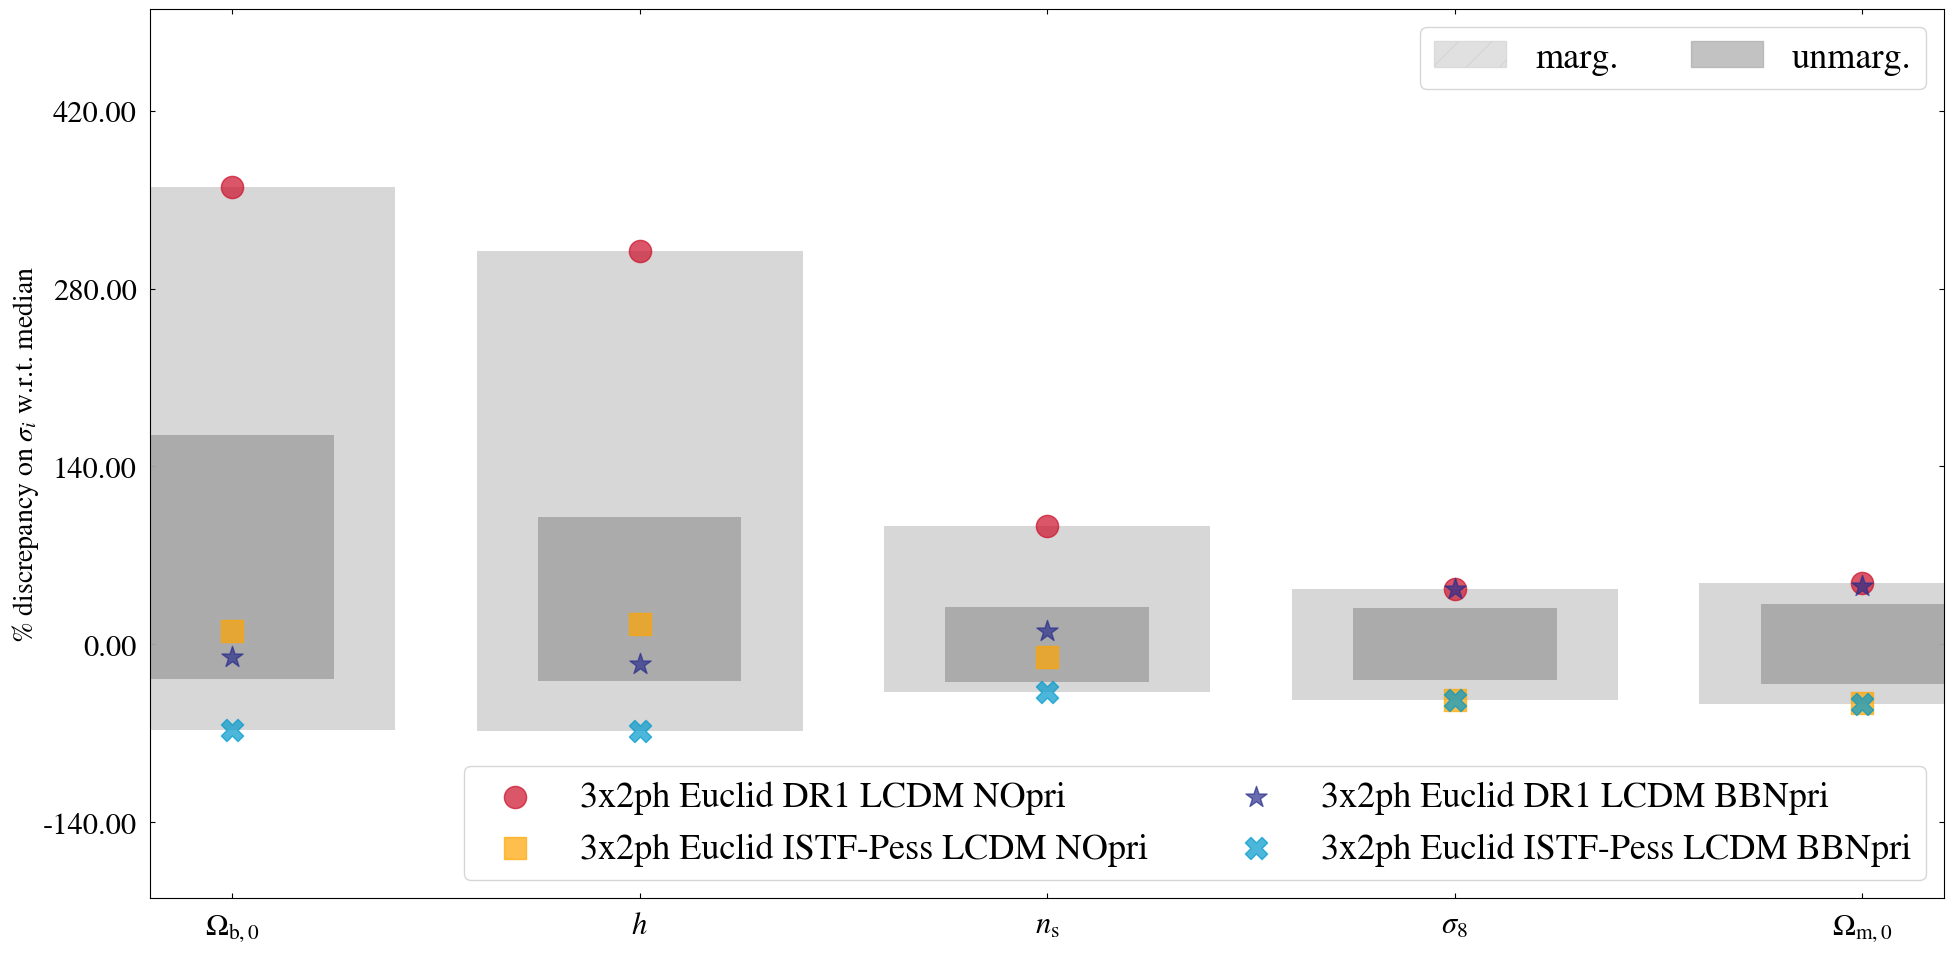

In [28]:
chooseind = [0,1, 2, 3]
plot_options = {'fishers_list': [Fishes_all[ii] for ii in chooseind], 
                'colors': [colorlist[ii] for ii in chooseind],
                'fish_labels': [Fishes_all[ii].name for ii in chooseind],
                'plot_pars': cosmo_pars,
                'axis_custom_factors': {'all':3},  ## Axis limits cover 3-sigma bounds of first Fisher matrix
                'plot_method': 'Gaussian',
                'file_format': '.pdf',   ##file format for all the plots
                'outpath' : './plots/',  ## directory where to store the files, if non-existent, it will be created
                'outroot':'Euclid-LCDM5p_3x2ph-BBNyesno'  ## file name root for all the plots, extra names can be added individually
                } 
fish_plotter = fpp.fisher_plotting(**plot_options)
fish_plotter.compare_errors({'yrang':[-200,500], 'ncol_legend':2})

Entering plotting routine
{'Omegab': [0.016775347868338744, 0.08162265213166126], 'h': [0.46351302462666605, 0.8838869753733338], 'ns': [0.9107736589287972, 1.0212263410712028], 'sigma8': [0.7837019766313614, 0.8362980233686387], 'Omegam': [0.29551944184432444, 0.34168055815567555], 'b1': [1.1000058511306703, 1.1759561488693295], 'b2': [1.1661654743652379, 1.2379985256347623], 'b3': [1.2209291703539404, 1.2890508296460597], 'b4': [1.28658117604346, 1.35160082395654], 'b5': [1.3567390004997502, 1.4217489995002497], 'b6': [1.6244117522827042, 1.7012462477172956], 'AIA': [0.661064151396678, 2.778935848603322], 'etaIA': [-1.1041747815957366, 0.28417478159573656]}


/home/santiago/CosmoProjects/cosmicfish_release/jellyfish/cosmicfishpie/cosmicfishpie/analysis/fisher_plotting.py:263: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  g.fig.savefig(
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


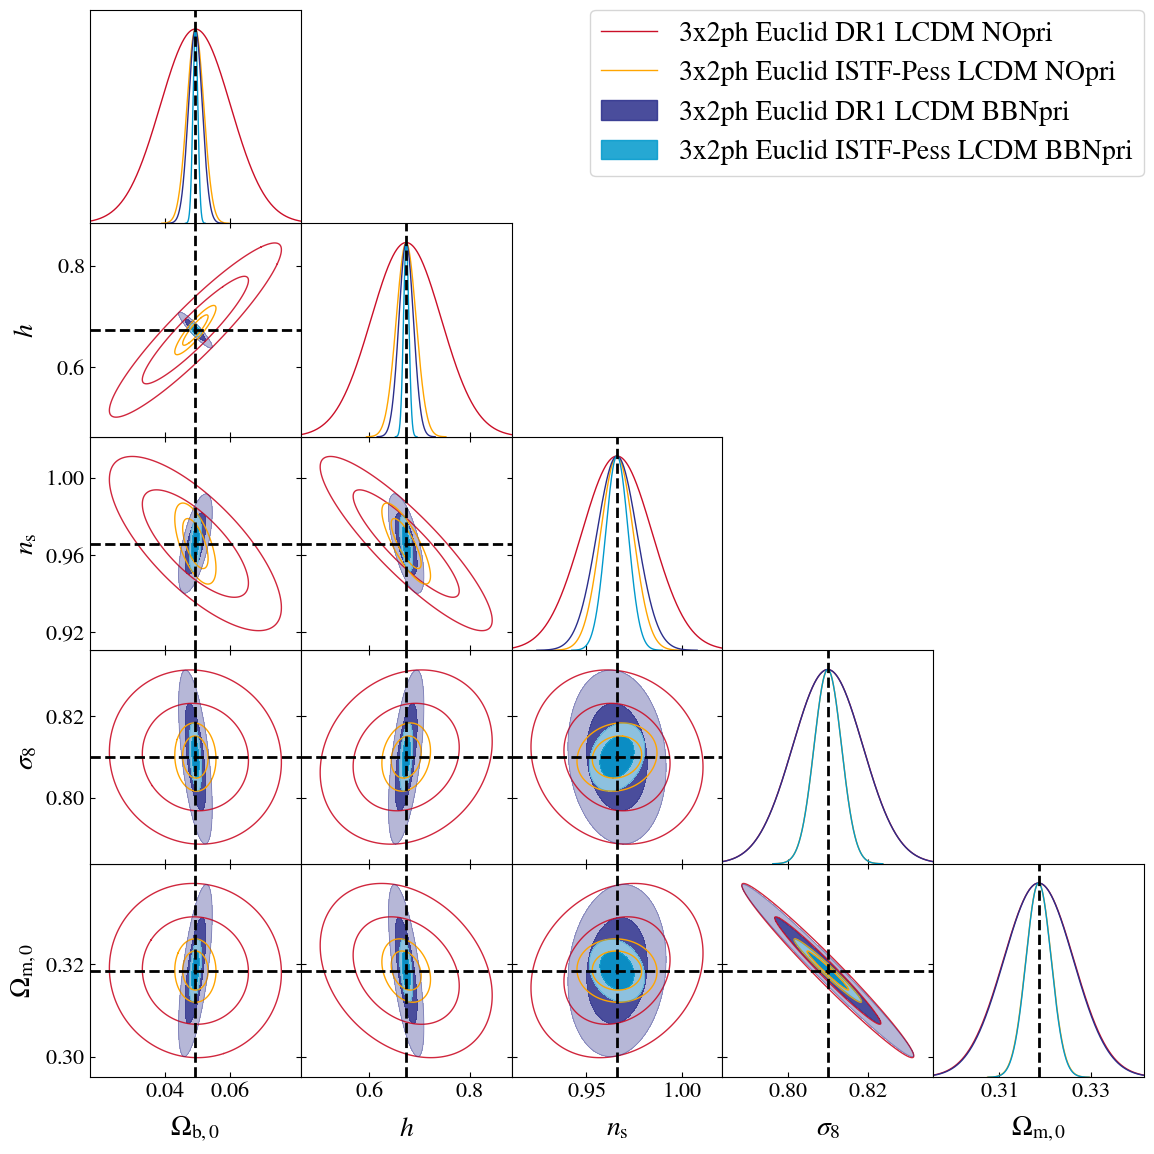

In [29]:
fish_plotter.plot_fisher(filled=[False, False, True, True])